In [108]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
!pip list


Package                      Version
---------------------------- -------------------
absl-py                      2.3.1
ace_tools                    0.0
asttokens                    3.0.0
astunparse                   1.6.3
attrs                        25.3.0
beautifulsoup4               4.9.3
bs4                          0.0.2
certifi                      2024.2.2
charset-normalizer           2.0.4
chromedriver-autoinstaller   0.6.4
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.1
cycler                       0.12.1
debugpy                      1.8.13
decorator                    5.2.1
exceptiongroup               1.2.2
executing                    2.2.0
filelock                     3.13.1
flatbuffers                  25.2.10
fonttools                    4.57.0
fsspec                       2024.6.1
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.73.1
h5py                       


[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
import tensorflow as tf
import os

In [111]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    

In [112]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [113]:
data_dir = 'data'

In [114]:
os.listdir(os.path.join(data_dir,'happy'))

['12345.jpeg',
 'image (10).jpeg',
 'image (11).jpeg',
 'image (12).jpeg',
 'image (4).jpeg',
 'image (5).jpeg',
 'image (7).jpeg',
 'image (8).jpeg',
 'image (9).jpeg',
 'images (12).jpeg',
 'images (13).jpeg',
 'images (14).jpeg',
 'images (15).jpeg',
 'images (16).jpeg',
 'images (17).jpeg',
 'images (18).jpeg',
 'images (19).jpeg',
 'images (20).jpeg',
 'images (21).jpeg',
 'images (22).jpeg',
 'images (23).jpeg',
 'images (24).jpeg',
 'images (25).jpeg',
 'images (26).jpeg',
 'images (27).jpeg',
 'images (28).jpeg',
 'images (29).jpeg',
 'images (30).jpeg',
 'images (31).jpeg',
 'images (32).jpeg',
 'images (33).jpeg',
 'images (34).jpeg',
 'images (35).jpeg',
 'images (39).jpeg',
 'images (40).jpeg',
 'images (41).jpeg',
 'images (42).jpeg',
 'images (43).jpeg',
 'images (44).jpeg',
 'images (45).jpeg',
 'images (5).jpeg',
 'images (6).jpeg',
 'images (7).jpeg',
 'images (8).jpeg']

In [115]:
image_exst = ['jpeg', 'jpg', 'png', 'bmp']


In [116]:
image_exst[0]

'jpeg'

In [117]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [118]:
cv2.imread(os.path.join('data', 'happy', 'imgi_47_images.jpg'))

In [119]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(os.path.join(data_dir, image_class, image))
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exst:
                print(f"Invalid image format: {image_path} with format {tip}")
                os.remove(image_path)
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")
            os.remove(image_path)

Load data


In [120]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [121]:
import numpy as np
from matplotlib import pyplot as plt

In [122]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [123]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 80 files belonging to 2 classes.


In [124]:
data_iterator = data.as_numpy_iterator()


In [125]:
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

In [126]:
#class 1 = sad ppl
#class 2 = happy ppl
batch[1]

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int32)

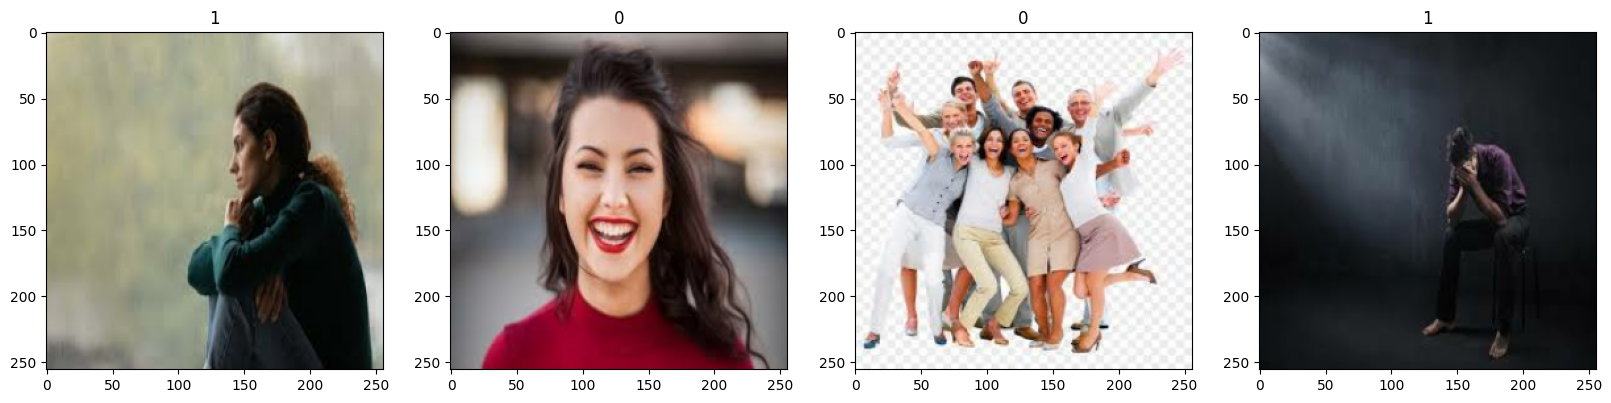

In [127]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
ax = ax.flatten()
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].set_title(batch[1][idx])

In [128]:
scaled = batch[0] / 255
scaled.max()

np.float32(1.0)

Preprocess Data

In [129]:
data = data.map(lambda x, y: (x / 255, y))

In [130]:
scaled_iterator = data.as_numpy_iterator()

In [131]:
data.as_numpy_iterator().next()

(array([[[[0.5647059 , 0.61960787, 0.6627451 ],
          [0.5647059 , 0.61960787, 0.6627451 ],
          [0.5647059 , 0.61960787, 0.6627451 ],
          ...,
          [0.5963465 , 0.65124846, 0.6865426 ],
          [0.59607846, 0.6509804 , 0.6862745 ],
          [0.59607846, 0.6509804 , 0.6862745 ]],
 
         [[0.5647059 , 0.61960787, 0.6627451 ],
          [0.5647059 , 0.61960787, 0.6627451 ],
          [0.5647059 , 0.61960787, 0.6627451 ],
          ...,
          [0.5963465 , 0.65124846, 0.6865426 ],
          [0.59607846, 0.6509804 , 0.6862745 ],
          [0.59607846, 0.6509804 , 0.6862745 ]],
 
         [[0.5647059 , 0.61960787, 0.6627451 ],
          [0.5647059 , 0.61960787, 0.6627451 ],
          [0.5647059 , 0.61960787, 0.6627451 ],
          ...,
          [0.5963465 , 0.65124846, 0.6865426 ],
          [0.59607846, 0.6509804 , 0.6862745 ],
          [0.59607846, 0.6509804 , 0.6862745 ]],
 
         ...,
 
         [[0.4666868 , 0.52158874, 0.564726  ],
          [0.46823

Split data

In [132]:

#Split data into train, validation, and test sets
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)

In [133]:
train_size


2

In [134]:
#train split the data up to train_size
train = data.take(train_size)

#val split the data after train_size and up to val_size
val = data.skip(train_size).take(val_size)

#test split the data after train_size + val_size
test = data.skip(train_size + val_size)

Build deep learning model

In [135]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [136]:
#Sequential: lets you build models layer-by-layer.
#Dense: fully connected layer.
#Conv2D: 2D convolutional layer for image feature extraction.
#Flatten: flattens input for dense layers.
#MaxPooling2D: reduces spatial size, keeps important features.
#Dropout: helps prevent overfitting.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

In [137]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
```
- Adds a 2D convolutional layer with 16 filters, each of size 3x3.
- Stride is 1.
- Activation is ReLU (introduces non-linearity).
- Expects input images of shape 256x256 with 3 color channels (RGB).

```
model.add(MaxPooling2D())
```
- Adds a max pooling layer (default pool size is 2x2).
- Reduces spatial dimensions, keeps important features.

```
model.add(Conv2D(32, (3,3), 1, activation='relu'))
```
- Another convolutional layer, now with 32 filters.

```
model.add(MaxPooling2D())
```
- Another max pooling layer.

```
model.add(Conv2D(16, (3,3), 1, activation='relu'))
```
- Another convolutional layer, back to 16 filters.

```
model.add(MaxPooling2D())
```
- Another max pooling layer.

```
model.add(Flatten())
```
- Flattens the output from previous layers into a 1D vector for the dense layers.

```
model.add(Dense(256, activation='relu'))
```
- Fully connected (dense) layer with 256 units and ReLU activation.

```
model.add(Dense(1, activation='sigmoid'))
```
- Output layer with 1 unit and sigmoid activation (for binary classification).

**Summary:**  
This model extracts features from images using convolution and pooling, then classifies them using dense layers. The final output is a probability (0 to 1) for binary classification.# filepath: e:\ImageClassification\ImageClassification.ipynb
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
```
- Adds a 2D convolutional layer with 16 filters, each of size 3x3.
- Stride is 1.
- Activation is ReLU (introduces non-linearity).
- Expects input images of shape 256x256 with 3 color channels (RGB).

```
model.add(MaxPooling2D())
```
- Adds a max pooling layer (default pool size is 2x2).
- Reduces spatial dimensions, keeps important features.

```
model.add(Conv2D(32, (3,3), 1, activation='relu'))
```
- Another convolutional layer, now with 32 filters.

```
model.add(MaxPooling2D())
```
- Another max pooling layer.

```
model.add(Conv2D(16, (3,3), 1, activation='relu'))
```
- Another convolutional layer, back to 16 filters.

```
model.add(MaxPooling2D())
```
- Another max pooling layer.

```
model.add(Flatten())
```
- Flattens the output from previous layers into a 1D vector for the dense layers.

```
model.add(Dense(256, activation='relu'))
```
- Fully connected (dense) layer with 256 units and ReLU activation.

```
model.add(Dense(1, activation='sigmoid'))
```
- Output layer with 1 unit and sigmoid activation (for binary classification).

**Summary:**  
This model extracts features from images using convolution and pooling, then classifies them using dense layers. The final output is a probability (0 to 1)

In [138]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


c:\Users\NealC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [139]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [140]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [141]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [142]:

logdir='logs'

In [143]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [144]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 544ms/step - accuracy: 0.4792 - loss: 0.8777
Epoch 2/20


c:\Users\NealC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 0.6771 - loss: 0.6196
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.7188 - loss: 0.6558
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 0.6979 - loss: 0.5672
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.6146 - loss: 0.5728
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - accuracy: 0.8333 - loss: 0.5205
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - accuracy: 0.8646 - loss: 0.4495
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - accuracy: 0.8542 - loss: 0.3976
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step - accuracy: 0.8021 - loss: 0.3753
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - accuracy: 0.8958 - loss: 0.2768
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.8854 - loss: 0.4087
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.9167 - loss: 0.2542
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step - accuracy: 0.9271 - loss: 0.1827

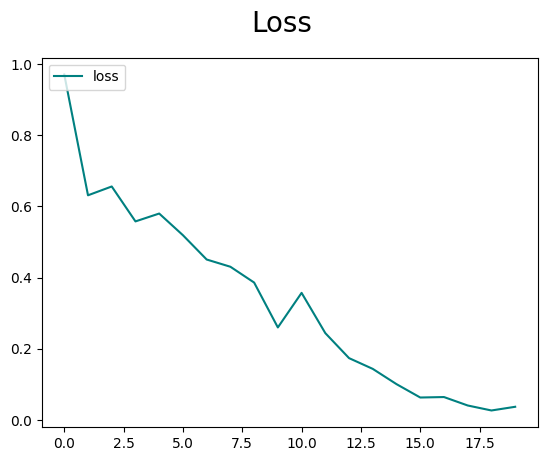

In [148]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
if 'val_loss' in hist.history:
	plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

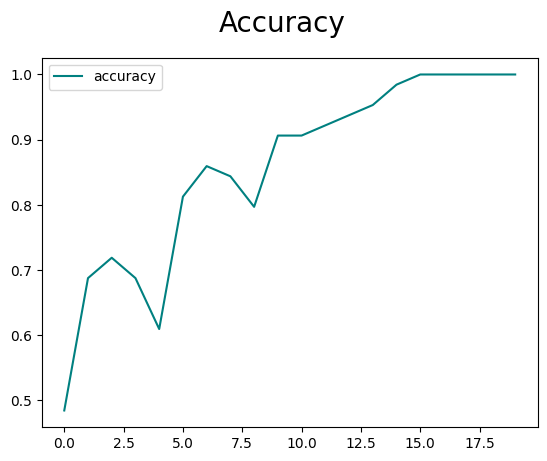

In [150]:

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
if 'val_accuracy' in hist.history:
	plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate

In [151]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [152]:

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [153]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


In [154]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


Test

In [155]:

import cv2

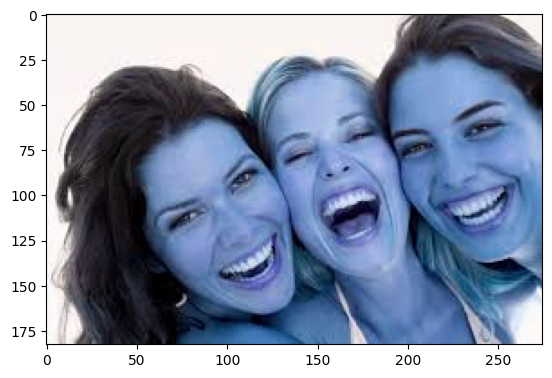

In [156]:

img = cv2.imread('12345.jpeg')
plt.imshow(img)
plt.show()

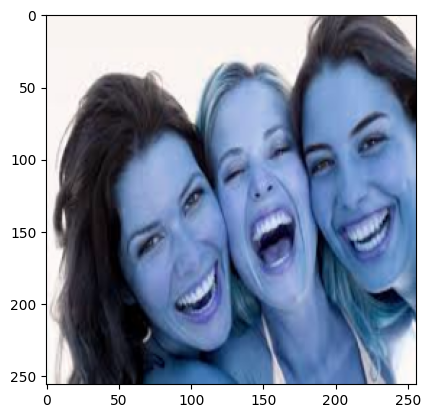

In [157]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [158]:

import numpy as np

yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


In [159]:

yhat

array([[0.02246013]], dtype=float32)

In [160]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


Save the model

In [161]:

from tensorflow.keras.models import load_model

In [162]:

model.save(os.path.join('models','imageclassifier.h5'))

In [163]:
new_model = load_model('imageclassifier.h5')


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'imageclassifier.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)